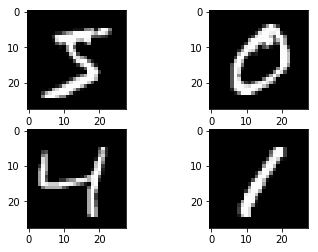

In [0]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import keras
import numpy as np
from keras.datasets import cifar10
from keras.applications.resnet50 import ResNet50
from keras.layers import GlobalAveragePooling2D, Dense
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from skimage.transform import resize
from IPython import embed

import pandas as pd
import matplotlib.pyplot as plt
import os
from urllib.request import urlopen,urlretrieve
from PIL import Image
from tqdm import tqdm_notebook
%matplotlib inline
from sklearn.utils import shuffle
import cv2

from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint


import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [0]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [0]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')


In [0]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255


In [0]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [0]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 24s - loss: 0.2810 - acc: 0.9206 - val_loss: 0.1414 - val_acc: 0.9571
Epoch 2/30
 - 9s - loss: 0.1115 - acc: 0.9678 - val_loss: 0.0914 - val_acc: 0.9715
Epoch 3/30
 - 9s - loss: 0.0715 - acc: 0.9799 - val_loss: 0.0783 - val_acc: 0.9775
Epoch 4/30
 - 9s - loss: 0.0504 - acc: 0.9858 - val_loss: 0.0749 - val_acc: 0.9764
Epoch 5/30
 - 8s - loss: 0.0372 - acc: 0.9893 - val_loss: 0.0676 - val_acc: 0.9793
Epoch 6/30
 - 9s - loss: 0.0267 - acc: 0.9928 - val_loss: 0.0630 - val_acc: 0.9802
Epoch 7/30
 - 9s - loss: 0.0206 - acc: 0.9948 - val_loss: 0.0610 - val_acc: 0.9810
Epoch 8/30
 - 8s - loss: 0.0140 - acc: 0.9970 - val_loss: 0.0618 - val_acc: 0.9801
Epoch 9/30
 - 8s - loss: 0.0108 - acc: 0.9977 - val_loss: 0.0575 - val_acc: 0.9821
Epoch 10/30
 - 8s - loss: 0.0076 - acc: 0.9988 - val_loss: 0.0577 - val_acc: 0.9820
Epoch 11/30
 - 8s - loss: 0.0067 - acc: 0.9988 - val_loss: 0.0636 - va

In [0]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [0]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [0]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [0]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 64s - loss: 0.2253 - acc: 0.9356 - val_loss: 0.0774 - val_acc: 0.9759
Epoch 2/30
 - 64s - loss: 0.0709 - acc: 0.9786 - val_loss: 0.0441 - val_acc: 0.9851
Epoch 3/30
 - 63s - loss: 0.0507 - acc: 0.9846 - val_loss: 0.0433 - val_acc: 0.9857
Epoch 4/30
 - 62s - loss: 0.0389 - acc: 0.9880 - val_loss: 0.0403 - val_acc: 0.9872
Epoch 5/30
 - 61s - loss: 0.0321 - acc: 0.9899 - val_loss: 0.0338 - val_acc: 0.9887
Epoch 6/30
 - 61s - loss: 0.0264 - acc: 0.9919 - val_loss: 0.0324 - val_acc: 0.9893
Epoch 7/30
 - 61s - loss: 0.0216 - acc: 0.9931 - val_loss: 0.0351 - val_acc: 0.9887
Epoch 8/30
 - 61s - loss: 0.0187 - acc: 0.9944 - val_loss: 0.0328 - val_acc: 0.9890
Epoch 9/30
 - 62s - loss: 0.0151 - acc: 0.9951 - val_loss: 0.0318 - val_acc: 0.9891
Epoch 10/30
 - 61s - loss: 0.0138 - acc: 0.9960 - val_loss: 0.0330 - val_acc: 0

In [0]:
 ###########################################################
  # load data cifar10
 from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

170500096/170498071 [==============================] - 28s 0us/step
(50000, 3, 32, 32) (50000, 1) (10000, 3, 32, 32) (10000, 1)


In [0]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# flatten 32*32*3 images to a 3072 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2] * X_train.shape[3]
print(num_pixels)
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')


3072


In [0]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
 - 69s - loss: 13.1319 - acc: 0.1484 - val_loss: 13.2966 - val_acc: 0.1371
Epoch 2/30
 - 67s - loss: 12.9822 - acc: 0.1609 - val_loss: 13.1366 - val_acc: 0.1413
Epoch 3/30
 - 69s - loss: 12.9728 - acc: 0.1583 - val_loss: 11.9610 - val_acc: 0.1758
Epoch 4/30
 - 68s - loss: 7.1997 - acc: 0.2362 - val_loss: 1.8351 - val_acc: 0.3472
Epoch 5/30
 - 68s - loss: 1.7366 - acc: 0.3817 - val_loss: 1.6801 - val_acc: 0.4051
Epoch 6/30
 - 68s - loss: 1.6418 - acc: 0.4170 - val_loss: 1.6171 - val_acc: 0.4277
Epoch 7/30
 - 71s - loss: 1.5915 - acc: 0.4404 - val_loss: 1.6131 - val_acc: 0.4265
Epoch 8/30
 - 71s - loss: 1.5450 - acc: 0.4559 - val_loss: 1.5518 - val_acc: 0.4506
Epoch 9/30
 - 69s - loss: 1.5072 - acc: 0.4680 - val_loss: 1.5435 - val_acc: 0.4550
Epoch 10/30
 - 71s - loss: 1.4748 - acc: 0.4818 - val_loss: 1.5200 - val_acc: 0.4526
Epoch 11/30
 - 69s - loss: 1.4483 - acc: 0.4881 - val_loss: 1.4791 - val_acc: 0.4745
Epoch 12/30
 - 70s

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.reshape(X_train.shape[0], 3, 32, 32).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 3, 32, 32).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(3, 32, 32), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
print(num_classes)


10


In [0]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
 - 87s - loss: 1.6357 - acc: 0.4171 - val_loss: 1.3765 - val_acc: 0.5099
Epoch 2/30
 - 86s - loss: 1.3221 - acc: 0.5311 - val_loss: 1.2540 - val_acc: 0.5634
Epoch 3/30
 - 87s - loss: 1.2025 - acc: 0.5767 - val_loss: 1.1771 - val_acc: 0.5875
Epoch 4/30
 - 86s - loss: 1.1263 - acc: 0.6061 - val_loss: 1.1164 - val_acc: 0.6101
Epoch 5/30
 - 86s - loss: 1.0647 - acc: 0.6283 - val_loss: 1.0792 - val_acc: 0.6208
Epoch 6/30
 - 86s - loss: 1.0185 - acc: 0.6461 - val_loss: 1.1029 - val_acc: 0.6139
Epoch 7/30
 - 87s - loss: 0.9740 - acc: 0.6617 - val_loss: 1.0422 - val_acc: 0.6369
Epoch 8/30
 - 87s - loss: 0.9358 - acc: 0.6734 - val_loss: 1.0789 - val_acc: 0.6226
Epoch 9/30
 - 86s - loss: 0.9042 - acc: 0.6836 - val_loss: 1.0093 - val_acc: 0.6509
Epoch 10/30
 - 86s - loss: 0.8713 - acc: 0.6973 - val_loss: 0.9949 - val_acc: 0.6560
Epoch 11/30
 - 86s - loss: 0.8500 - acc: 0.7036 - val_loss: 1.0002 - val_acc: 0.6568
Epoch 12/30
 - 87s - los